In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anthro.viz
colors = anthro.viz.plotting_style()
plt.rcParams["font.family"] = "Lucida Sans Unicode"

In [2]:
#%% Load the population data 
pop_data = pd.read_csv('../../../data/anthropocentric/FAOSTAT_world_population/processed/FAOSTAT_rural_urban_population.csv')
pop_data['pop_bil'] = pop_data['population'] / 1E9
total_pop = pop_data.groupby(['year'])['pop_bil'].sum().reset_index()
min_pop, max_pop = total_pop['pop_bil'].min(), total_pop['pop_bil'].max()

In [3]:
h20 = pd.read_csv('../../../data/water/Qin2019_water_use/processed/Qin2019_category_volume_1980-2016.csv')
merged = h20.merge(total_pop, on='year')

In [4]:
merged.head()

,category,year,volume_km3,pop_bil
0,agriculture,1980,850.8,4.458412
1,domestic_municipal,1980,32.6,4.458412
2,reservoir,1980,321.0,4.458412
3,thermal_power,1980,6.5,4.458412
4,agriculture,1981,869.9,4.537846


In [5]:
decades = [1980, 1990, 2000, 2010, 2020]
ag_decades = np.zeros(4)
dom_decades = np.zeros(4)
res_decades = np.zeros(4)
power_decades = np.zeros(4)


for i in range(len(decades)-1):
    
    decade = decades[i]
    
    df_decade = merged[merged['year']>= decade]
    df_decade = merged[merged['year']< decades[i+1]]
    
    pop_decade = df_decade['pop_bil'].mean()
    ag_decade = df_decade[df_decade['category']=='agriculture']['volume_km3'].mean() / pop_decade
    dom_decade = df_decade[df_decade['category']=='domestic_municipal']['volume_km3'].mean() / pop_decade
    res_decade = df_decade[df_decade['category']=='reservoir']['volume_km3'].mean() / pop_decade
    power_decade = df_decade[df_decade['category']=='thermal_power']['volume_km3'].mean() / pop_decade
    
    ag_decades[i] = ag_decade
    dom_decades[i] = dom_decade
    res_decades[i] = res_decade
    power_decades[i] = power_decade

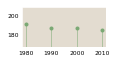

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita [m$^{3}$]', fontsize=6)
ax.set_xticks((1980, 1990, 2000, 2010))
#ax.set_yticks((0, 5, 10))
ax.set_ylim((np.min(ag_decades)*0.9,np.max(ag_decades)*1.1))

ax.plot(decades[0:-1], ag_decades, 'o', ms=3, color=colors['green'])
ax.vlines(decades[0:-1], 0, ag_decades, lw=0.5, color=colors['green'])

plt.savefig('../../../figures/database_paper/ag_water_decades.svg')

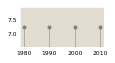

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita [m$^{3}$]', fontsize=6)
ax.set_xticks((1980, 1990, 2000, 2010))
#ax.set_yticks((0, 5, 10))
ax.set_ylim((np.min(dom_decades)*0.9,np.max(dom_decades)*1.1))

ax.plot(decades[0:-1], dom_decades, 'o', ms=3, color='grey')
ax.vlines(decades[0:-1], 0, dom_decades, lw=0.5, color='grey')

plt.savefig('../../../figures/database_paper/dom_water_decades.svg')

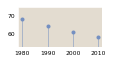

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita [m$^{3}$]', fontsize=6)
ax.set_xticks((1980, 1990, 2000, 2010))
#ax.set_yticks((0, 5, 10))
ax.set_ylim((np.min(res_decades)*0.9,np.max(res_decades)*1.1))

ax.plot(decades[0:-1], res_decades, 'o', ms=3, color=colors['blue'])
ax.vlines(decades[0:-1], 0, res_decades, lw=0.5, color=colors['blue'])

plt.savefig('../../../figures/database_paper/res_water_decades.svg')

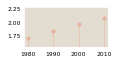

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita [m$^{3}$]', fontsize=6)
ax.set_xticks((1980, 1990, 2000, 2010))
#ax.set_yticks((0, 5, 10))
ax.set_ylim((np.min(power_decades)*0.9,np.max(power_decades)*1.1))

ax.plot(decades[0:-1], power_decades, 'o', ms=3, color=colors['light_red'])
ax.vlines(decades[0:-1], 0, power_decades, lw=0.5, color=colors['light_red'])

plt.savefig('../../../figures/database_paper/power_water_decades.svg')

In [8]:
plt.rcParams["font.family"] = "Lucida Sans Unicode"